Dataset obtenido de: https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min?resource=download

El dataset cuenta con registros de 9879 partidas de rangos diamante y maestro bajo.
Aqui se muestran diferentes estadisticas de las partidas divididas en equipo azul y equipo rojo.

In [14]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


Se importa las librerias

In [15]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

Se importa el dataset

In [16]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Revisamos por valores nulos dentro del set

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

Usando Seaborn vamos a graficar distintos atributos del dataset

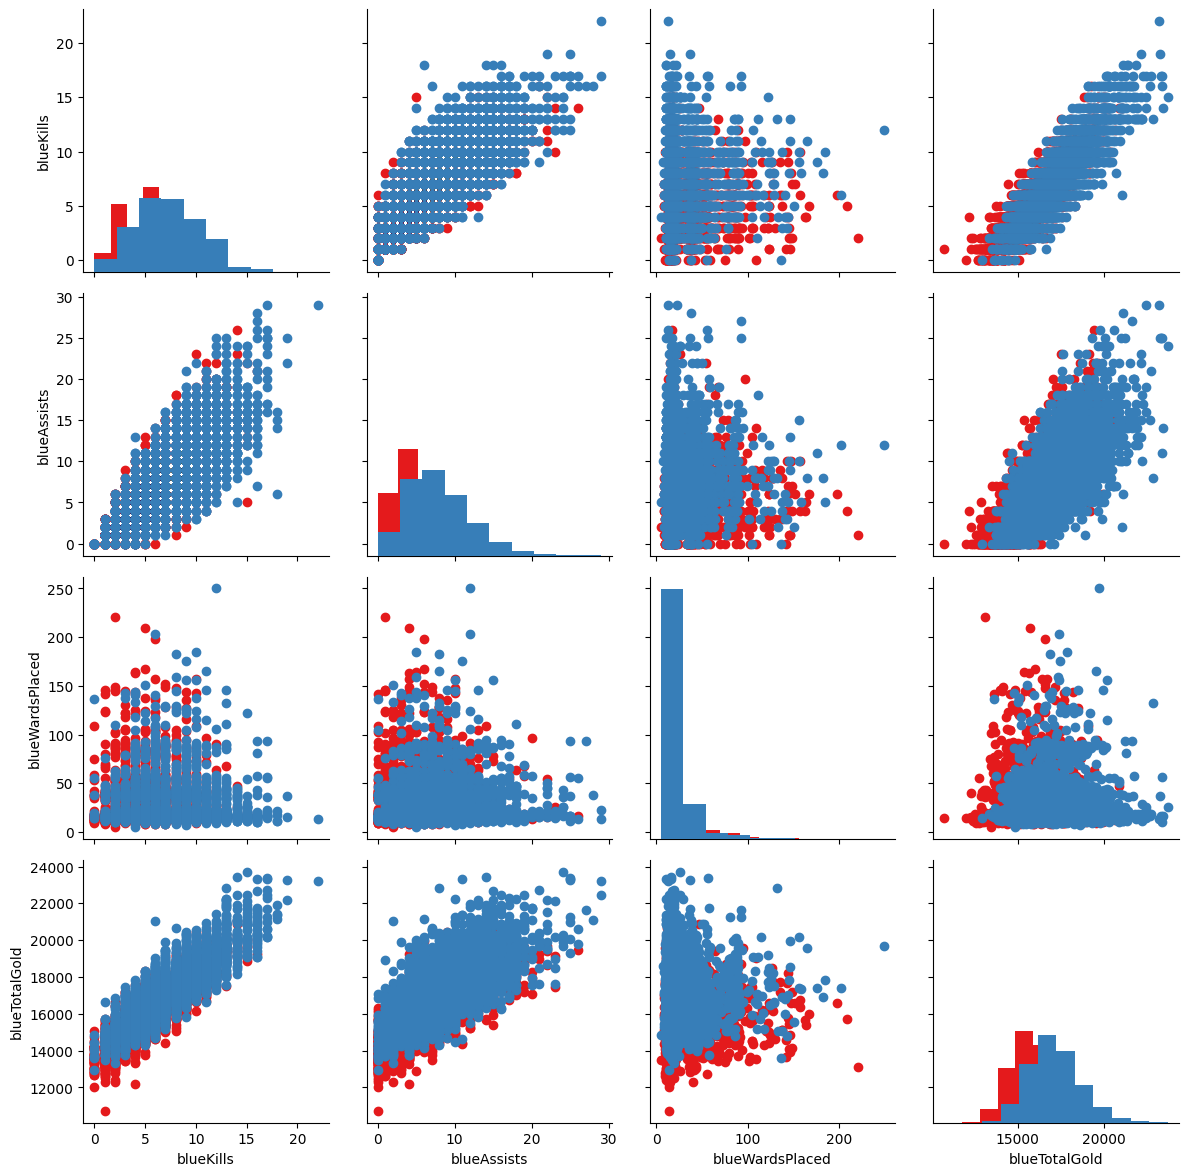

In [18]:
seabornGraph = sns.PairGrid(data=df, vars=['blueKills','blueAssists', 'blueWardsPlaced','blueTotalGold'],hue='blueWins',height=3,palette = 'Set1')
seabornGraph.map_diag(plt.pyplot.hist)
seabornGraph.map_offdiag(plt.pyplot.scatter)

Se puede observar que los datos tienen una relacion entre si de forma linear o que se asemejan mucho la dispersion

Creamos una matriz de correlacion y relizamos una grafica usando seaborn y pyplot

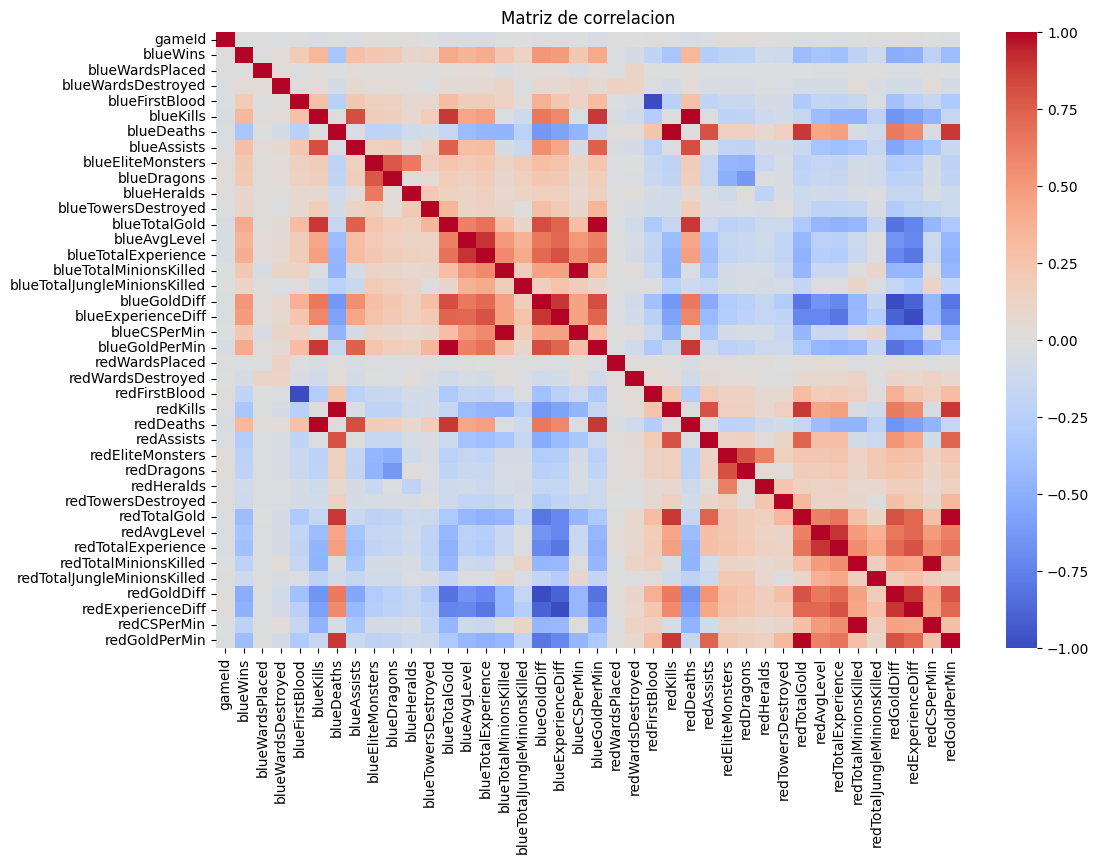

In [19]:
correlation_matrix = df.corr()

plt.pyplot.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.pyplot.title('Matriz de correlacion')
plt.pyplot.show()

Se puede notar que la grafica se divide en 4 segmentos que representan lo mismo debido a que en cada eje se suelen repetir los atributos.

Al analizar uno de estos segmentos se puede observar que las victorias del equipo azul son altamente dependientes del la cantidad de veces que muere el equipo rojo. Otra relacion bastante interesante es la diferencia de oro implica tambien una diferencia en experiencia. Dado que en el juego apesar de no poder conseguir oro deberian poder seguir a la par o bastante cercanos en experiencia.

Otro factor interesante es como apesar de que algo muy dicho en la comunidad sobre la vision de mapa es muy importante para el juego se nota que la cantidad de wards colocados no tienen una gran correlacion con la cantidad de juegos ganados a favor de ningun equipo.

Siguiente extraemos los valores numericos para poder hacer un analisis de distintas propiedades del dataset

In [20]:
numeric_data = df_table.select_dtypes(include=[np.number]).drop(columns=['gameId'])

numpy_stats = pd.DataFrame({
    'Mean': np.mean(numeric_data, axis=0),
    'Standard Deviation': np.std(numeric_data, axis=0),
    'Min': np.min(numeric_data, axis=0),
    'Max': np.max(numeric_data, axis=0)
})

numpy_stats

,Mean,Standard Deviation,Min,Max
blueWins,0.499038,0.499999,0.0,1.0
blueWardsPlaced,22.288288,18.018264,5.0,250.0
blueWardsDestroyed,2.824881,2.174888,0.0,27.0
blueFirstBlood,0.504808,0.499977,0.0,1.0
blueKills,6.183925,3.010876,0.0,22.0
blueDeaths,6.137666,2.933669,0.0,22.0
blueAssists,6.645106,4.064314,0.0,29.0
blueEliteMonsters,0.549954,0.625495,0.0,2.0
blueDragons,0.361980,0.480573,0.0,1.0
blueHeralds,0.187974,0.390692,0.0,1.0


Aqui se puede observar unas caracteristicas interesantes que talvez no se puedan representar bien con la data que se tienen pero existe un ligero desbalance en el porcentaje de victoria de los equipos a favor del equipo azul. Se ha notado que el quipo azul suele tener mas victorias que el equipo rojo, la unica caracteristica que puede afectar esto dentro del juego es la posicion de tu equipo en el mapa, para elaborar el mapa es un cuadrado dividio por una diagonal que va de la esquina superior izquierda a la esquina inferior derecha. Se ha atribuido a que al estar en la parte de abajo la ui del juego estorba menos que al quipo rojo que cubre la parte inferior donde estarian los enemigos. Esto se ha teorizado es balanceado dando al equipo rojo un rating o mmr acumulado ligeramente superior al equipo azul.

Otras caracteristicas interesantes es como el quipop rojo tiene mayores kills de elite monsters. Esto puede ser debido denuevo a la posicion del mapa siendo el mountruo elite mas comun  el dragon, la posicion del dragon da un acceso mas sencillo al equipo rojo para poder atacar el objetivo.